### 문제정의
- 붓꽃의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특징을 활용해 3가지 품종을 분류해보자.

In [1]:
### 불러오기 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris  ###  연습해보라고 기본적으로 제공해주는 것이다
from sklearn.neighbors import KNeighborsClassifier  ### KNN 모델
from sklearn import metrics  

In [2]:
data=load_iris()   ### data를 출력해보면 딕셔너리와 유사한 형태인 것을 살펴볼수 있다

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data['data'] # 문제, 특징, 특성

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
data['target'] # 정답, 라벨, 클래스

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data['target_names']  # 정답 데이터 의미

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data['feature_names'] # 특징이름, 컬럼이름

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(data['DESCR'])   ### 데이터에 대한 설명서

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터 셋 구성하기
- 문제와 답 분리
- 훈련세트, 평가세트 분리

In [9]:
X=data['data'][:,:]
y=data['target']

In [10]:
#data['data']
#data['data'][:,:]

#data['target']

In [11]:
### 풀이

In [12]:
X=pd.DataFrame(data['data'],columns=data.feature_names)
y=data.target

In [13]:
y ### 여기서 이전처럼 슬라이싱 해오면   0 과 1로만 공부하고 2를 맞추라는 식이 되서 올바른 모델이 되지 못한다
### 랜덤으로 뽑아야한다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
### 불러오기.  연습데이터 랜덤뽑기
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test,y_train,y_test=train_test_split(X,y,  ### 문제 와 정답 순으로 ,### 순서까지 똑같이 입력해야한다
                                               test_size=0.3,
                                               random_state=1)     ### 뽑을때마다 랜덤이 달라지는것을 방지. 
                                                                    ### 같은 숫자를 입력하면 같이 랜덤으로 된다

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### 모델링

In [17]:
knn=KNeighborsClassifier()

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
pre=knn.predict(X_test)

In [20]:
metrics.accuracy_score(pre,y_test)

0.9777777777777777

### 하이퍼파라미터 튜닝

In [21]:
### k값이 얼마일때 정확도를 높힐 수 있을까?
train_list=[]
test_list=[]

for i in range(1,50,2):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train,y_train)
    
    test_pre=m.predict(X_test)
    test_score=metrics.accuracy_score(test_pre,y_test)
    test_list.append(test_score)
    
    train_pre=m.predict(X_train)
    train_score=metrics.accuracy_score(train_pre,y_train)
    train_list.append(train_score)

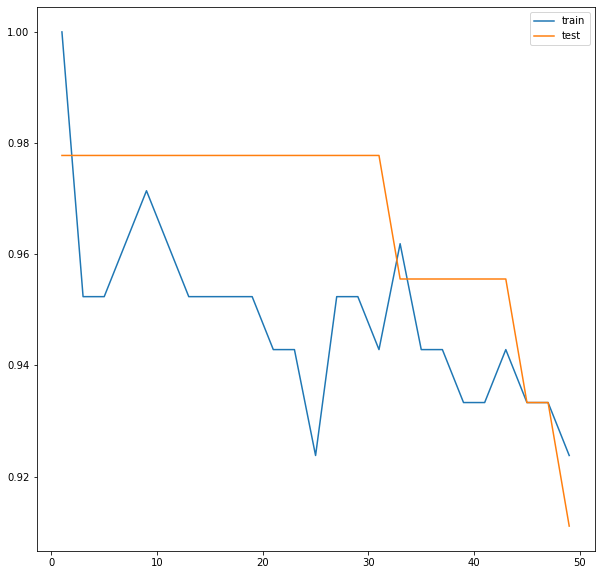

In [23]:
plt.figure(figsize=(10,10))
plt.plot(range(1,50,2 ),train_list,label='train'  )
plt.plot(range(1,50,2 ),test_list,label='test'  )
plt.legend()
plt.show()
